<a href="https://colab.research.google.com/github/shalmalirao/scratchpad/blob/main/nb_2026_01_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Read in Data
*01/05/2026*

In [1]:
! git clone https://github.com/ds4e/get_data
%run ./get_data/get_data.py

Cloning into 'get_data'...


Download complete
Extracting data files...
Data extracted


### General EDA
*01/20/2026*

In [2]:
import pandas as pd

df = pd.read_csv("data/tech_stocks.csv")
df.head()

,Unnamed: 0,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,0,MSFT,2016-05-16,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,1,MSFT,2002-01-16,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,2,MSFT,2001-09-18,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,3,MSFT,2007-10-26,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,4,MSFT,2014-06-27,41.61,42.29,41.51,42.25,38.6773,74640000,1.0


In [7]:
df.dtypes

Unnamed: 0                    int64
symbol                       object
date                 datetime64[ns]
open                        float64
high                        float64
low                         float64
close                       float64
close_adjusted              float64
volume                        int64
split_coefficient           float64
dtype: object

In [9]:
df["date"] = pd.to_datetime(df["date"])
df["date"].min(), df["date"].max()

(Timestamp('1998-01-02 00:00:00'), Timestamp('2021-06-14 00:00:00'))

In [8]:
df['symbol'].value_counts()

symbol
MSFT    5899
AAPL    5899
AMZN    5899
NVDA    5633
NFLX    4796
FB      2282
GOOG    1816
Name: count, dtype: int64

In [10]:
df['close'].describe()

count    32224.000000
mean       237.196459
std        441.134899
min          5.220000
25%         28.487500
50%         81.090000
75%        216.145000
max       3531.450000
Name: close, dtype: float64

<Axes: >

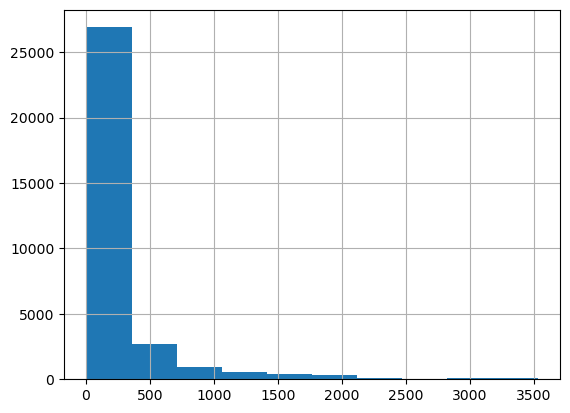

In [11]:
df['close'].hist()

In [14]:
mean_highs = df.groupby('symbol')['high'].mean()
mean_highs

symbol
AAPL     166.144575
AMZN     498.892820
FB       133.849505
GOOG    1039.188256
MSFT      62.955143
NFLX     168.714395
NVDA      77.733289
Name: high, dtype: float64

In [15]:
mean_lows = df.groupby('symbol')['low'].mean()
mean_lows

symbol
AAPL     162.295925
AMZN     486.935827
FB       130.695800
GOOG    1019.631458
MSFT      61.494318
NFLX     163.285616
NVDA      74.777375
Name: low, dtype: float64

In [16]:
mean_highs - mean_lows

symbol
AAPL     3.848650
AMZN    11.956993
FB       3.153705
GOOG    19.556798
MSFT     1.460825
NFLX     5.428779
NVDA     2.955914
dtype: float64

### KDE, ECDF
*01/27/2026*

In [17]:
import numpy as np
import seaborn as sns

<Axes: xlabel='close', ylabel='Density'>

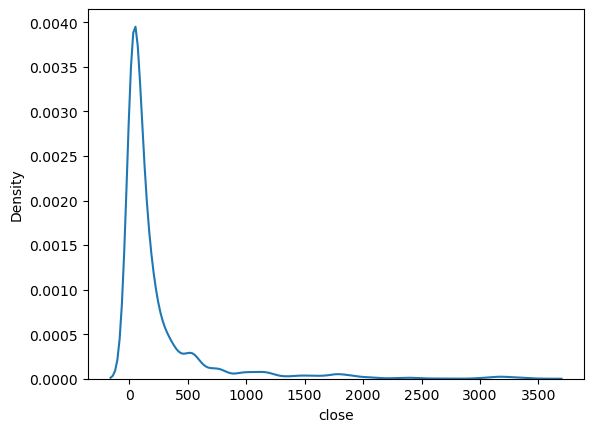

In [21]:
sns.kdeplot(df['close'])

<Axes: xlabel='close', ylabel='Proportion'>

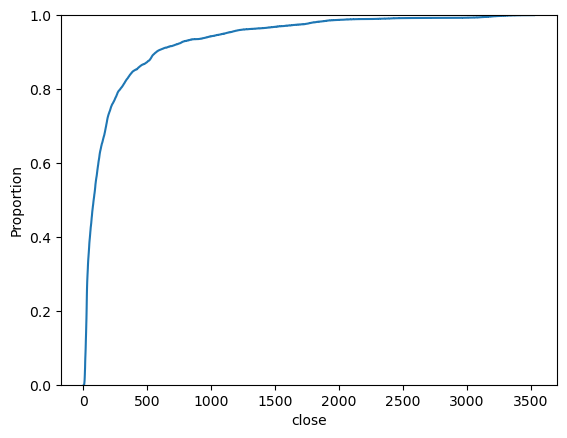

In [18]:
sns.ecdfplot(df['close'])

In [20]:
df['close'].describe()

count    32224.000000
mean       237.196459
std        441.134899
min          5.220000
25%         28.487500
50%         81.090000
75%        216.145000
max       3531.450000
Name: close, dtype: float64

### Outliers
*01/27/2026*

<Axes: xlabel='close'>

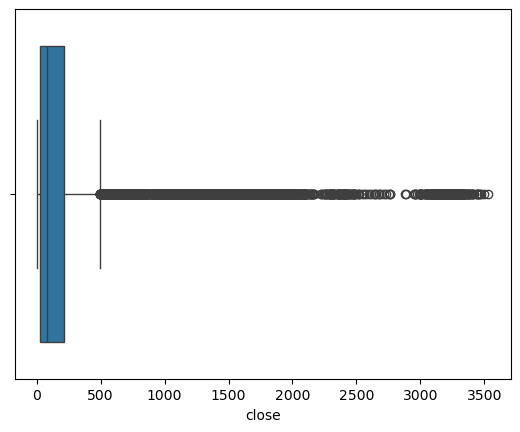

In [30]:
sns.boxplot(x = df['close'])

<Axes: xlabel='close'>

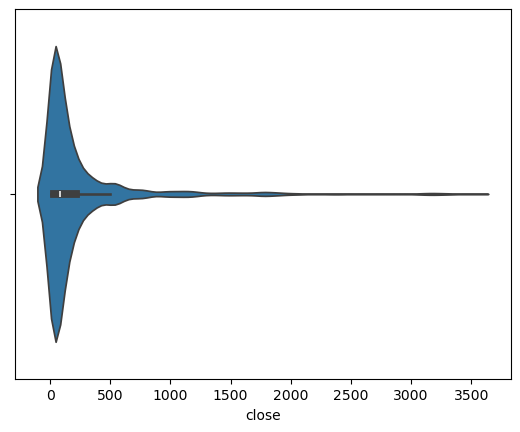

In [34]:
sns.violinplot(x = df['close'])

In [39]:
def outlier_analysis(x):
    q75 = np.quantile(x, .75)
    q25 = np.quantile(x, .25)
    iqr = q75 - q25
    uw = q75 + 1.5 * iqr  # upper whisker
    lw = q25 - 1.5 * iqr  # lower whisker
    upper_outlier = (x > uw).astype(int)
    lower_outlier = (x < lw).astype(int)
    outlier = upper_outlier + lower_outlier
    winsorize = (
        upper_outlier * uw +   # map upper outlier to upper whisker
        lower_outlier * lw +   # map lower outlier to lower whisker
        (1 - outlier) * x      # if neither, keep original value
    )

    return outlier, winsorize


In [40]:
outlier, winsorize = outlier_analysis(df['close'])

In [41]:
winsorize

0         51.83
1         67.87
2         54.32
3         35.03
4         42.25
          ...  
32219    331.26
32220    333.68
32221    330.25
32222    326.04
32223    336.77
Name: close, Length: 32224, dtype: float64

<Axes: xlabel='close', ylabel='close'>

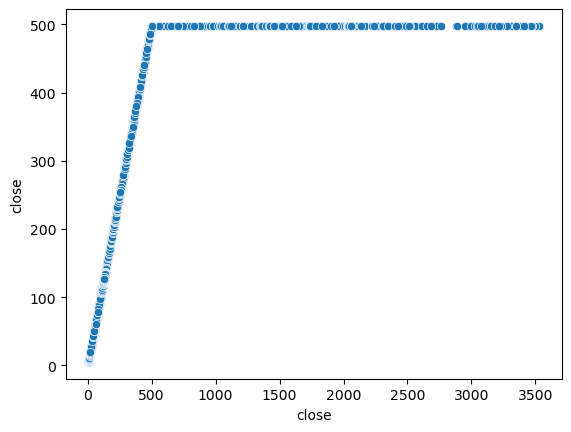

In [43]:
sns.scatterplot(x=df['close'], y=winsorize)